In [1]:
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import matplotlib.dates as mdates
import random
from matplotlib.font_manager import FontProperties


In [37]:
# 设置你的tushare token，你需要在tushare官网注册并获取token
#tushare网址：https://tushare.pro/
ts.set_token('请输入你在tushare官网注册并获取的token')

# 初始化pro接口
pro = ts.pro_api()

# ts_code()选择要查询的股票代码,000001.SZ为深圳证券交易所的代码
# start_date()和end_date()获取股票历史数据，可以选择开始和结束日期
# fields()选择特定字段
df = pro.daily(ts_code='000001.SZ', start_date='20240101', end_date='20240831')

# 读取股票历史数据前20行
df.head(20)
#trade_date:日期；open：开盘价；high：最高价；low：最低价；close：收盘价；pre_close：前收盘价，指上一个交易日（通常是上一交易日）的收盘价；
# change：涨跌额，指当前交易日的收盘价相对于前一交易日收盘价的涨跌金额，通常以元为单位；pct_chg（涨跌幅）：指当前交易日的收盘价相对于前一交易日收盘价的涨跌幅度，通常以百分比表示。
#vol：成交量 ； amount：成交额。

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20240830,10.11,10.26,10.11,10.16,10.13,0.03,0.2962,1294059.08,1318858.688
1,000001.SZ,20240829,10.31,10.38,10.11,10.13,10.33,-0.20,-1.9361,1197676.31,1221351.092
2,000001.SZ,20240828,10.41,10.43,10.28,10.33,10.43,-0.10,-0.9588,942547.54,973872.155
3,000001.SZ,20240827,10.47,10.52,10.37,10.43,10.49,-0.06,-0.5720,723136.58,755583.764
4,000001.SZ,20240826,10.50,10.55,10.42,10.49,10.47,0.02,0.1910,740675.24,775921.849
5,000001.SZ,20240823,10.39,10.50,10.32,10.47,10.38,0.09,0.8671,1071905.71,1117475.768
6,000001.SZ,20240822,10.34,10.45,10.32,10.38,10.35,0.03,0.2899,1109030.39,1153871.816
7,000001.SZ,20240821,10.30,10.38,10.21,10.35,10.34,0.01,0.0967,1034887.81,1068207.868
8,000001.SZ,20240820,10.32,10.43,10.28,10.34,10.29,0.05,0.4859,1569186.65,1623147.686
9,000001.SZ,20240819,10.13,10.30,10.12,10.29,10.13,0.16,1.5795,1482985.26,1520594.688


In [4]:
#查看数据集的形状（行，列）
df.shape
#查看数据中是否有空值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     162 non-null    object 
 1   trade_date  162 non-null    object 
 2   open        162 non-null    float64
 3   high        162 non-null    float64
 4   low         162 non-null    float64
 5   close       162 non-null    float64
 6   pre_close   162 non-null    float64
 7   change      162 non-null    float64
 8   pct_chg     162 non-null    float64
 9   vol         162 non-null    float64
 10  amount      162 non-null    float64
dtypes: float64(9), object(2)
memory usage: 14.1+ KB


In [5]:
#描述性统计分析，其中count是总计数值、mean是均值、std是标准差。
df.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,1.620000e+02
mean,10.256605,10.367716,10.176667,10.276049,10.266852,0.009198,0.100701,1.352682e+06,1.398905e+06
std,0.577815,0.585226,0.577076,0.572803,0.575625,0.141166,1.392021,7.187910e+05,7.772801e+05
min,9.050000,9.180000,8.960000,9.090000,9.090000,-0.320000,-2.949300,3.530135e+05,3.532514e+05
25%,10.020000,10.105000,9.925000,10.030000,10.015000,-0.080000,-0.756375,8.800796e+05,9.183113e+05
50%,10.305000,10.415000,10.255000,10.330000,10.330000,-0.010000,-0.093050,1.194382e+06,1.253545e+06
75%,10.557500,10.667500,10.480000,10.597500,10.582500,0.080000,0.830125,1.627568e+06,1.622386e+06
max,11.560000,11.740000,11.460000,11.560000,11.560000,0.980000,9.979600,5.055285e+06,5.307736e+06


In [39]:
#修改列名
df = df.rename(columns={'trade_date': 'date'})
#转换日期格式
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
print(df['date'])
print(df)
# 将'date'列转换为float型
#df['date'] = df['date'].astype(float)


0      2024-08-30
1      2024-08-29
2      2024-08-28
3      2024-08-27
4      2024-08-26
          ...    
157    2024-01-08
158    2024-01-05
159    2024-01-04
160    2024-01-03
161    2024-01-02
Name: date, Length: 162, dtype: object
       ts_code        date   open   high    low  close  pre_close  change  \
0    000001.SZ  2024-08-30  10.11  10.26  10.11  10.16      10.13    0.03   
1    000001.SZ  2024-08-29  10.31  10.38  10.11  10.13      10.33   -0.20   
2    000001.SZ  2024-08-28  10.41  10.43  10.28  10.33      10.43   -0.10   
3    000001.SZ  2024-08-27  10.47  10.52  10.37  10.43      10.49   -0.06   
4    000001.SZ  2024-08-26  10.50  10.55  10.42  10.49      10.47    0.02   
..         ...         ...    ...    ...    ...    ...        ...     ...   
157  000001.SZ  2024-01-08   9.23   9.30   9.11   9.15       9.27   -0.12   
158  000001.SZ  2024-01-05   9.10   9.44   9.07   9.27       9.11    0.16   
159  000001.SZ  2024-01-04   9.19   9.19   9.08   9.11       9.20   -0

In [40]:
#读取特定列数据,其中sort_values是升序排序，按(by='date')日期的方式进行
#f = df.sort_values(by='date')
#Pandas DataFrame是一个二维的、大小可变的表格型数据结构，具有行索引和列索引。此处应该的‘f’并不是一个字典，而是一个Pandas DataFrame对象。
#所以f[]使用单括号是不正确的，应该用f[[]]来存储。
feature_data = df[['open', 'high', 'low', 'close', 'vol', 'amount']]
print(feature_data)

      open   high    low  close         vol       amount
0    10.11  10.26  10.11  10.16  1294059.08  1318858.688
1    10.31  10.38  10.11  10.13  1197676.31  1221351.092
2    10.41  10.43  10.28  10.33   942547.54   973872.155
3    10.47  10.52  10.37  10.43   723136.58   755583.764
4    10.50  10.55  10.42  10.49   740675.24   775921.849
..     ...    ...    ...    ...         ...          ...
157   9.23   9.30   9.11   9.15  1121156.19  1029006.549
158   9.10   9.44   9.07   9.27  1991622.16  1852659.692
159   9.19   9.19   9.08   9.11   864193.99   787470.082
160   9.19   9.22   9.15   9.20   733610.31   673673.614
161   9.39   9.42   9.21   9.21  1158366.45  1075742.252

[162 rows x 6 columns]


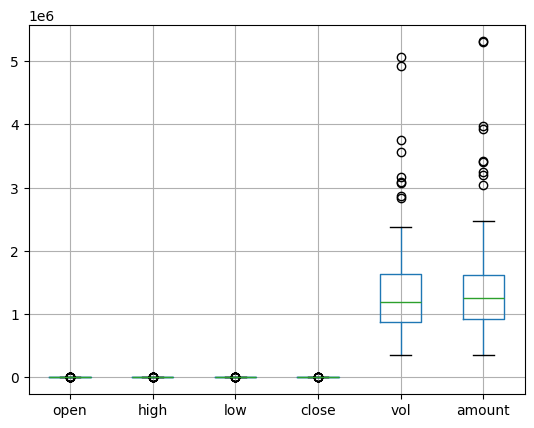

In [8]:
#绘制箱型图
feature_data.boxplot()
#显示图表
plt.show()


In [5]:
#数据归一化 采用0-1标准，公式如下： x = (x-Min)/(Max-Min)
normalize_data=(feature_data-feature_data.min())/(feature_data.max()-feature_data.min())
normalize_data = normalize_data.sort_index()
print(normalize_data)

         open      high    low     close       vol    amount
0    0.422311  0.421875  0.460  0.433198  0.200126  0.194896
1    0.501992  0.468750  0.460  0.421053  0.179629  0.175215
2    0.541833  0.488281  0.528  0.502024  0.125372  0.125264
3    0.565737  0.523437  0.564  0.542510  0.078712  0.081206
4    0.577689  0.535156  0.584  0.566802  0.082441  0.085311
..        ...       ...    ...       ...       ...       ...
157  0.071713  0.046875  0.060  0.024291  0.163356  0.136393
158  0.019920  0.101562  0.044  0.072874  0.348472  0.302637
159  0.055777  0.003906  0.048  0.008097  0.108709  0.087642
160  0.055777  0.015625  0.076  0.044534  0.080939  0.064673
161  0.135458  0.093750  0.100  0.048583  0.171269  0.145826

[162 rows x 6 columns]


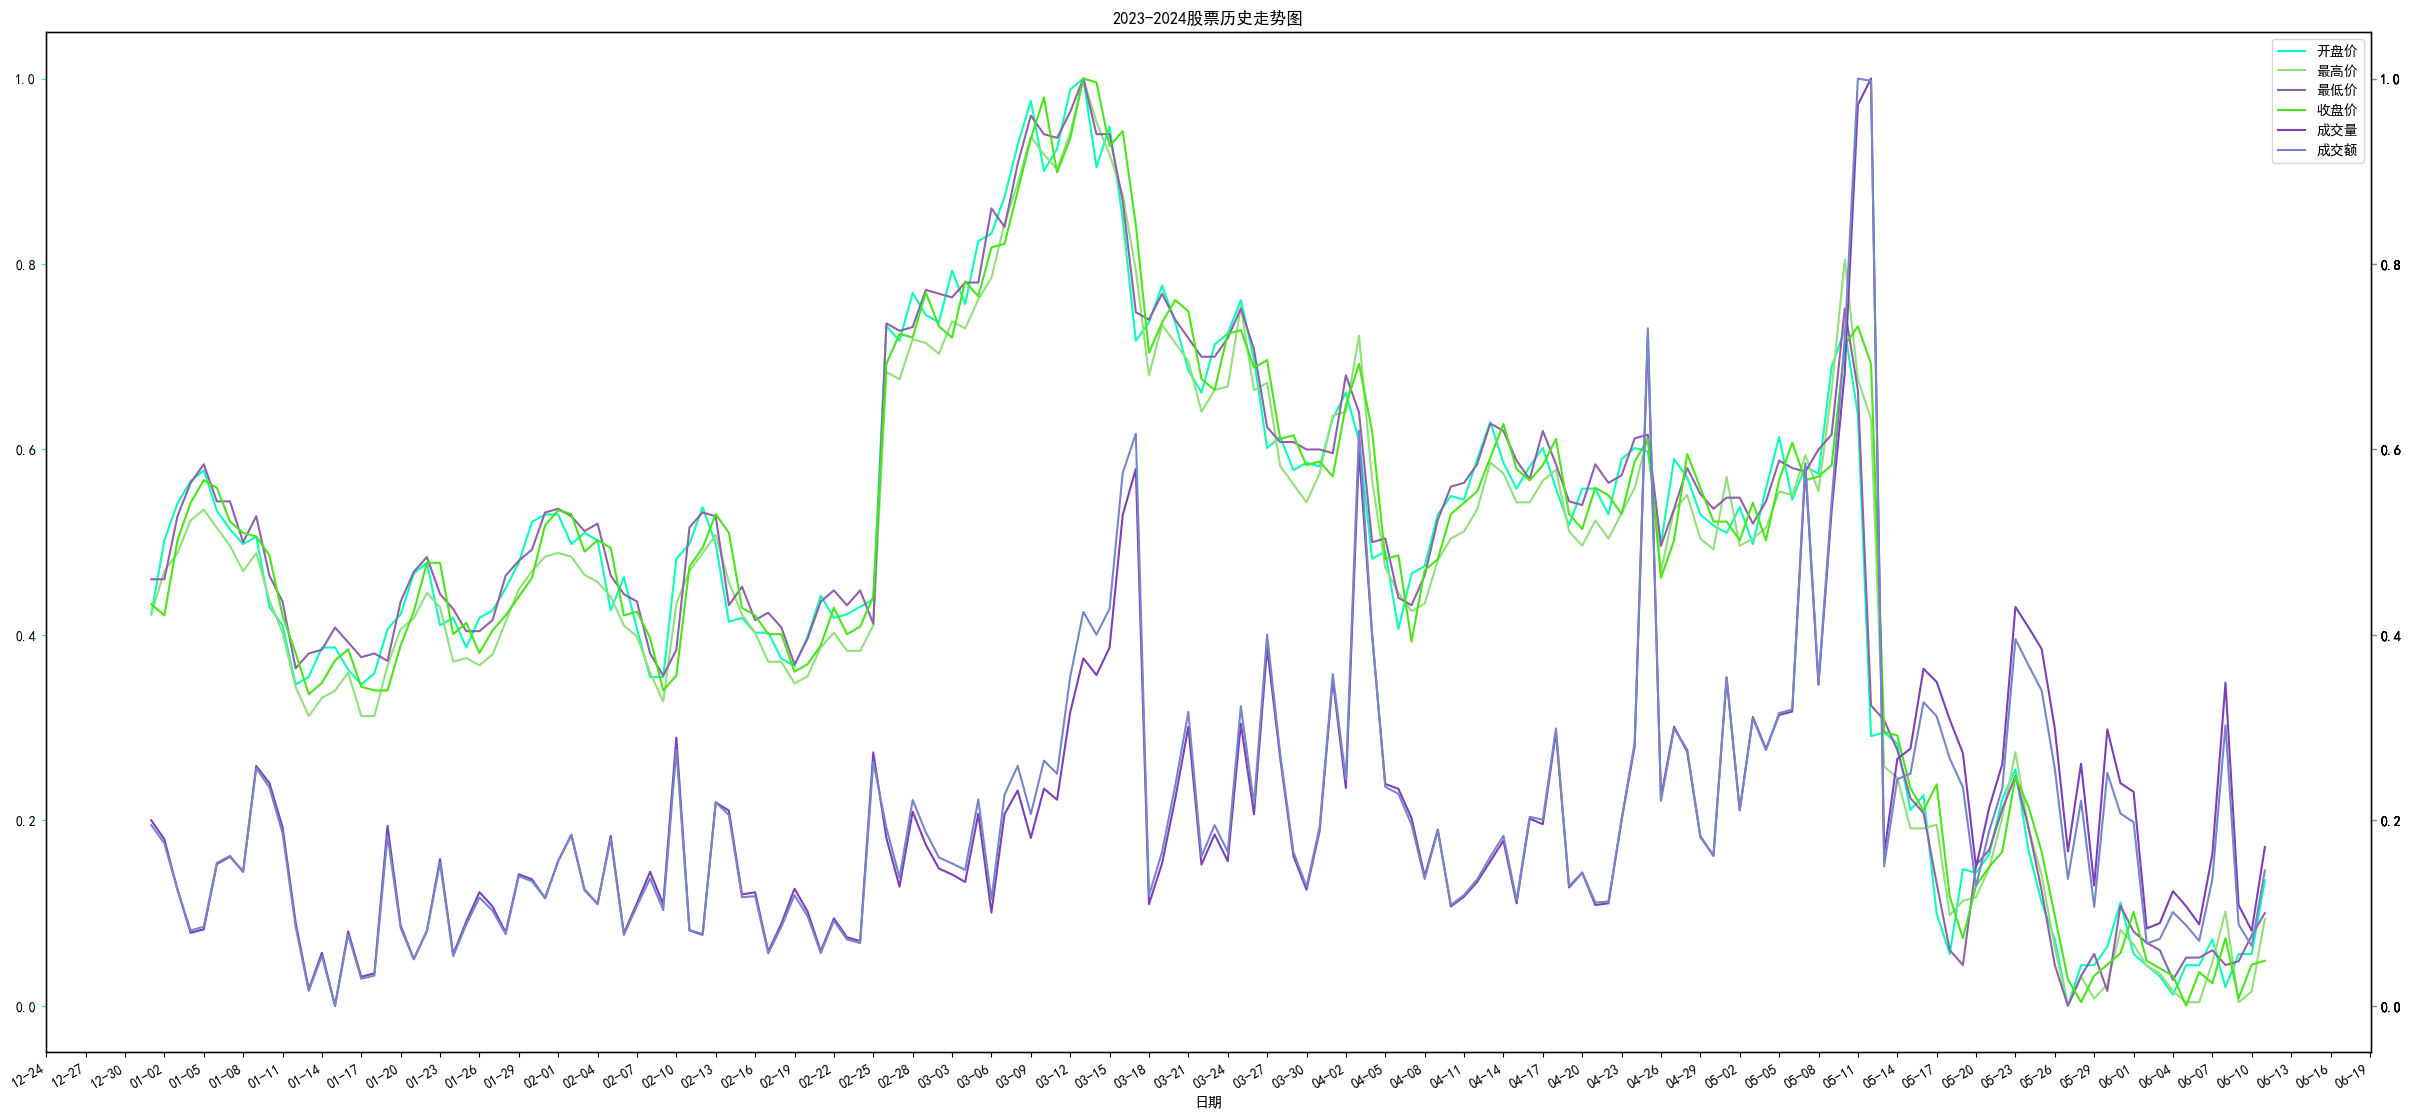

In [6]:
#绘制股票走势图
x = df['date']
y1 = normalize_data['open']
y2 = normalize_data['high']
y3 = normalize_data['low']
y4 = normalize_data['close']
y5 = normalize_data['vol']
y6 = normalize_data['amount']

# 生成随机颜色
def colors():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

# 生成六个随机颜色
colors = [colors() for _ in range(7)]


# 创建一个新的图形（figure）和一个子图（axes）
fig, ax1 = plt.subplots(figsize=(30,15))

# 绘制第一个y轴的折线图,x和y1分别是x轴和y轴的数据，color=colors[0]表示折线的颜色由colors列表的第一个元素决定。
ax1.plot(x, y1, color=colors[0], label='开盘价')
#这行代码设置子图ax1的x轴标签为“日期”
ax1.set_xlabel('日期')
#这行代码设置子图ax1的y轴标签为“open”,并设置标签颜色
#ax1.set_ylabel('open', color=colors[0])
#这行代码设置子图ax1的y轴刻度标签的颜色为colors列表的第二个元素。
ax1.tick_params('y', color=colors[0])

# 创建第二个y轴
ax2 = ax1.twinx()
ax2.plot(x, y2, color=colors[1], label='最高价')
#ax2.set_ylabel('high', color=colors[1])
ax2.tick_params('y', color=colors[1])

# 创建第三个y轴
ax3 = ax1.twinx()
ax3.plot(x, y3, color=colors[2], label='最低价')
#ax3.set_ylabel('low', color=colors[2])
ax3.tick_params('y', color=colors[2])

# 创建第四个y轴
ax4 = ax1.twinx()
ax4.plot(x, y4, color=colors[3], label='收盘价')
#ax4.set_ylabel('close', color=colors[3])
ax4.tick_params('y', color=colors[3])

# 创建第五个y轴
ax5 = ax1.twinx()
ax5.plot(x, y5, color=colors[4],label='成交量')
#ax5.set_ylabel('vol', color=colors[4])
ax5.tick_params('y', color=colors[4])

# 创建第六个y轴
ax6 = ax1.twinx()
ax6.plot(x, y6, color=colors[5],label='成交额')
#ax6.set_ylabel('amount', color=colors[5])
ax6.tick_params('y', color=colors[5])


# 添加标题
plt.title("2023-2024股票历史走势图")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#plt.rcParams['font.style'] = 'italic'


#设置日期显示格式为月-日
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#自动旋转日期标记
plt.gcf().autofmt_xdate()
# 设置间隔为7天
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
lines5, labels5 = ax5.get_legend_handles_labels()
lines6, labels6 = ax6.get_legend_handles_labels()

# 合并所有图例
lines = lines1 + lines2 + lines3 + lines4 + lines5 + lines6
labels = labels1 + labels2 + labels3 + labels4 + labels5 + labels6

# 创建一个新的图例并添加到图形中
leg = plt.legend(lines, labels, loc='best')

plt.show()

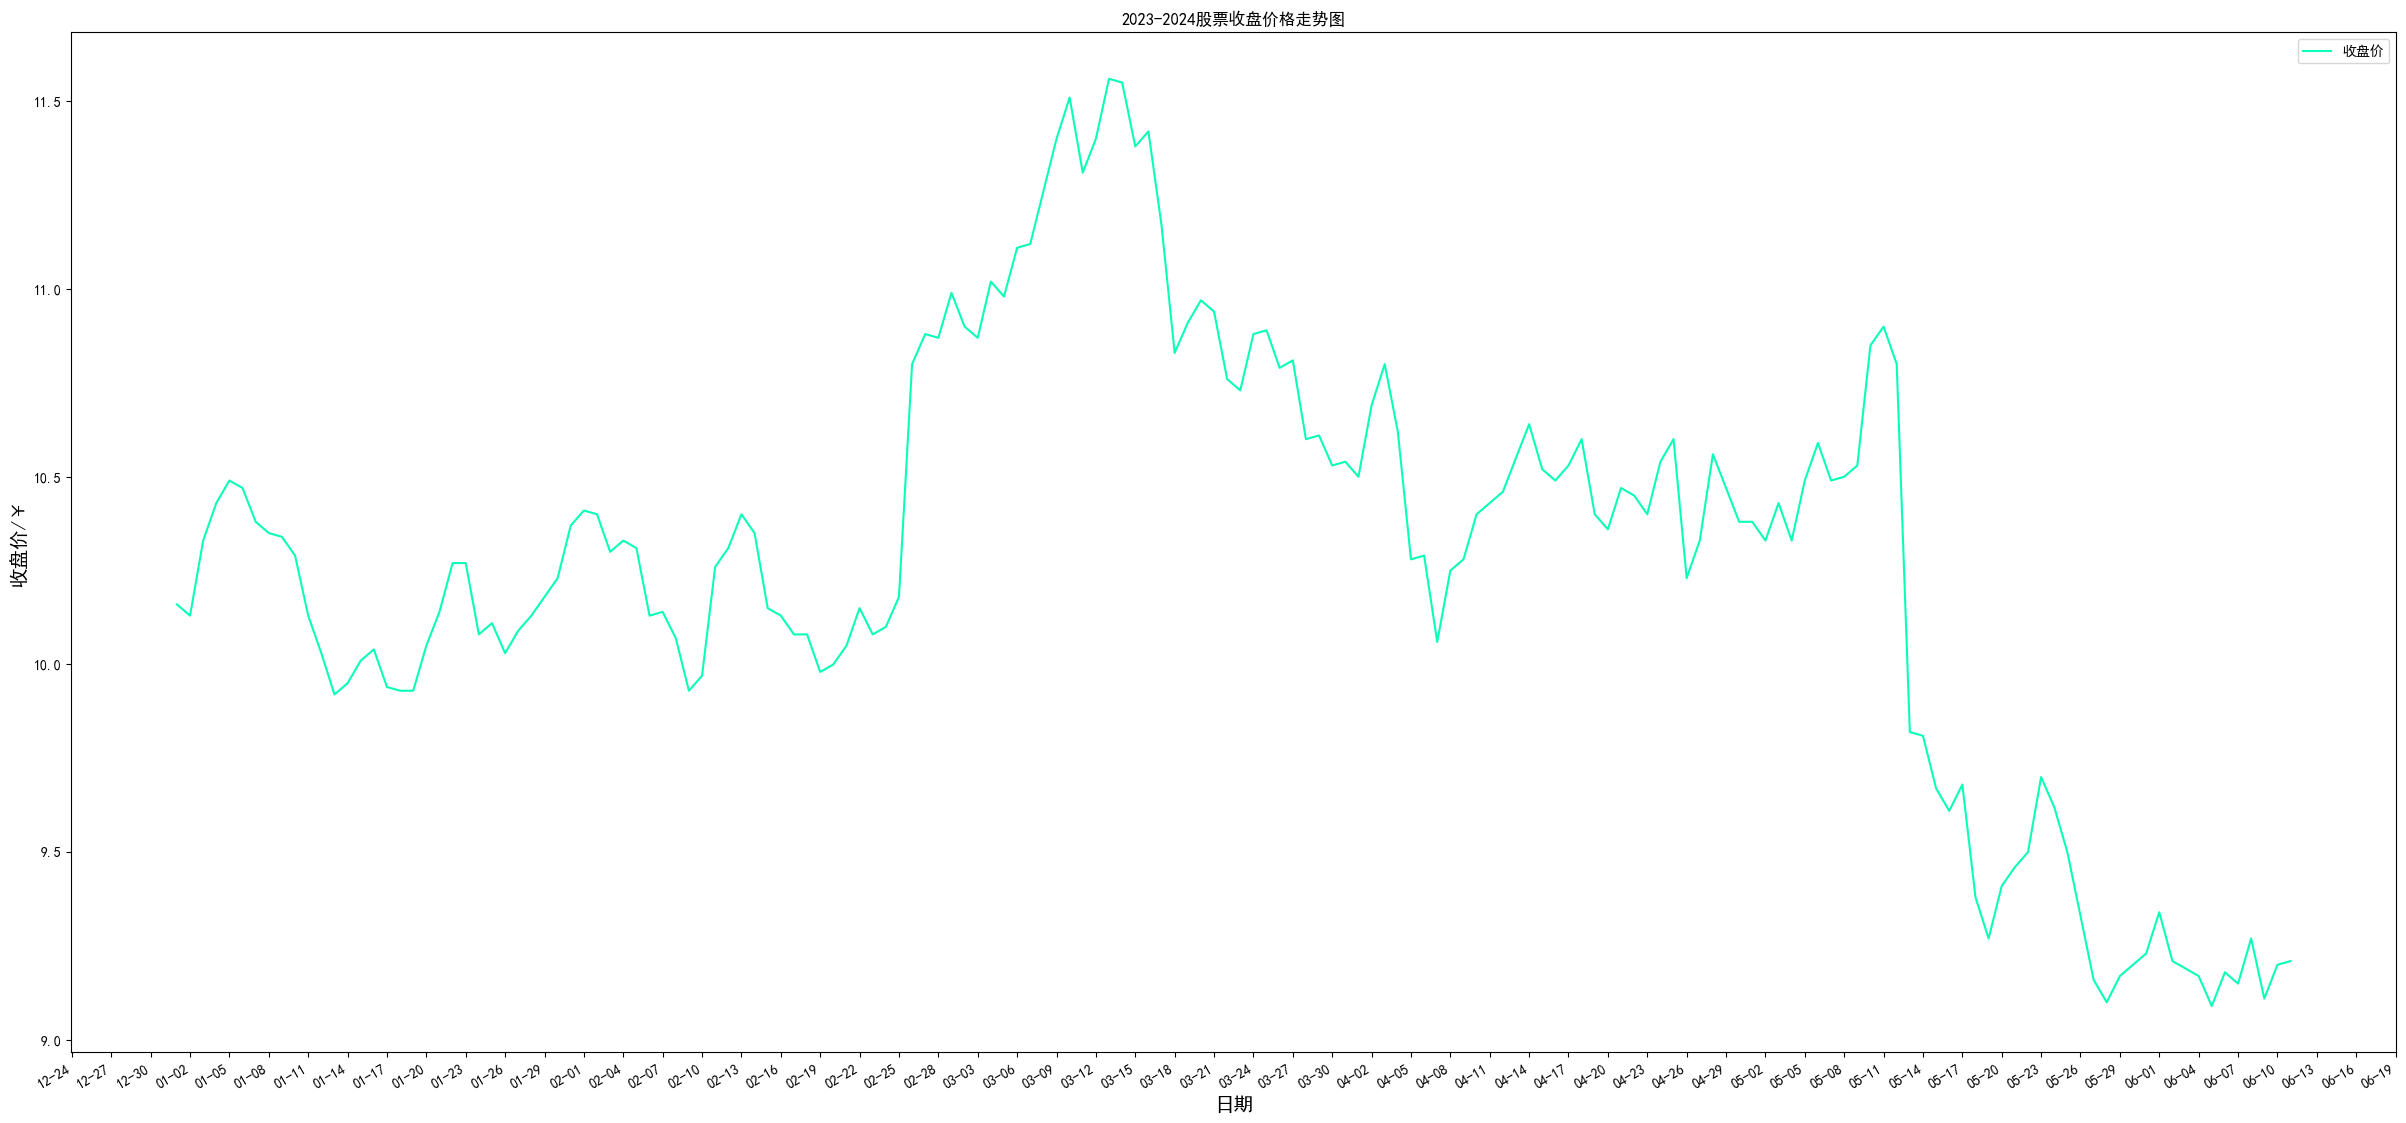

In [10]:
x = df['date']
y = feature_data['close']

# 创建一个新的图形（figure）和一个子图（axes）
fig, ax1 = plt.subplots(figsize=(30,15))
# 绘制第一个y轴的折线图,x和y1分别是x轴和y轴的数据，color=colors[0]表示折线的颜色由colors列表的第一个元素决定。
ax1.plot(x, y, color=colors[0], label='收盘价')
#这行代码设置子图ax1的x轴标签为“日期”
ax1.set_xlabel('日期',fontsize='14')
plt.ylabel('收盘价/￥',fontsize='14')
# 添加标题
plt.title("2023-2024股票收盘价格走势图")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
# 创建一个新的图例并添加到图形中
leg = plt.legend(lines1, labels1, loc='best')

#设置日期显示格式为月-日
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#自动旋转日期标记
plt.gcf().autofmt_xdate()
# 设置间隔为7天
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.show()



股票涨跌走势图：

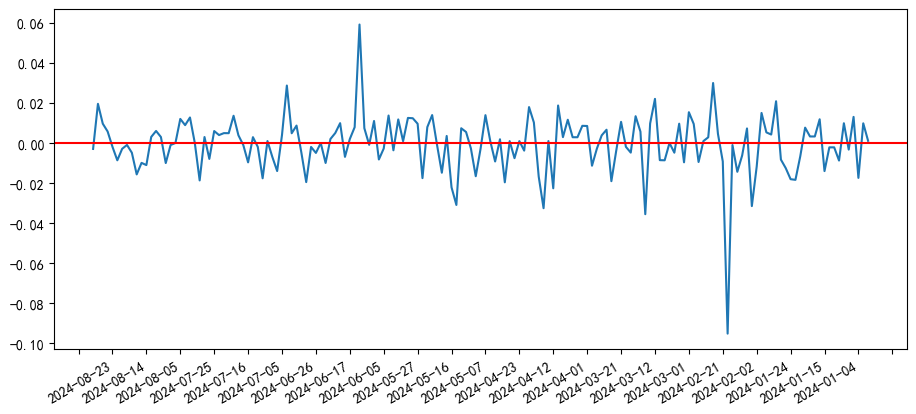

In [23]:
x = df['date']

# 抽取指定日期范围的“收盘价”数据
#mydate1=df['date'].loc['2024-08-31':'2024-01-01']
mydate_close=df.close
# 对数收益率= 当日收盘价取对数-昨日收盘价取对数
log_change=np.log(mydate_close)-np.log(mydate_close.shift(1))

plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 设置画布和画板
fig,ax=plt.subplots(figsize=(11,5)) 
# 绘制图表
ax.plot(x,log_change)
# 绘制水平分割线，标记股票收盘价相对于y=0的偏离程度
ax.axhline(y=0,color='red')
# 日期刻度定位为星期
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
# 自动旋转日期标记
plt.gcf().autofmt_xdate() 
plt.show()

股票K线走势图：

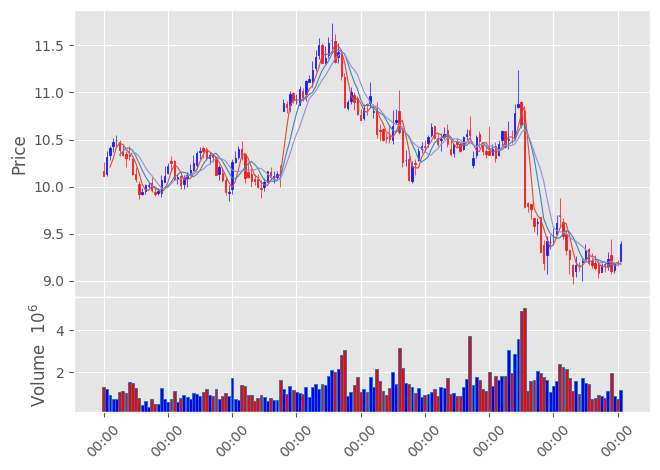

In [45]:
# 抽取指定日期范围的数据
df2 = df.rename(columns={'vol': 'volume'})
df2.index=pd.to_datetime(df2.index)   # 将数据索引类型转换为datetime

# 绘制k线图
# 自定义颜色
mc = mpf.make_marketcolors(
    up='red',     # 上涨k线柱子的颜色为“红色”
    down='blue', # 下跌k线柱子的颜色为“绿色”
    edge='i',     # k线图柱子边缘的颜色（i代表继承自up和down的颜色）,下同
    volume='i',   # 成交量直方图的颜色
    wick='i'      # 上下影线的颜色
)
# 调用make_mpf_style()函数，自定义k线图样式
mystyle = mpf.make_mpf_style(base_mpl_style="ggplot", marketcolors=mc)
# 自定义样式mystyle
# 显示成交量
# 添加移动平均线mav（即3、6、9日的平均线）
mpf.plot(df2,type='candle',style=mystyle,volume=True,mav=(3,6,9))
plt.show()

In [41]:
df2 = df
print(df2)

       ts_code        date   open   high    low  close  pre_close  change  \
0    000001.SZ  2024-08-30  10.11  10.26  10.11  10.16      10.13    0.03   
1    000001.SZ  2024-08-29  10.31  10.38  10.11  10.13      10.33   -0.20   
2    000001.SZ  2024-08-28  10.41  10.43  10.28  10.33      10.43   -0.10   
3    000001.SZ  2024-08-27  10.47  10.52  10.37  10.43      10.49   -0.06   
4    000001.SZ  2024-08-26  10.50  10.55  10.42  10.49      10.47    0.02   
..         ...         ...    ...    ...    ...    ...        ...     ...   
157  000001.SZ  2024-01-08   9.23   9.30   9.11   9.15       9.27   -0.12   
158  000001.SZ  2024-01-05   9.10   9.44   9.07   9.27       9.11    0.16   
159  000001.SZ  2024-01-04   9.19   9.19   9.08   9.11       9.20   -0.09   
160  000001.SZ  2024-01-03   9.19   9.22   9.15   9.20       9.21   -0.01   
161  000001.SZ  2024-01-02   9.39   9.42   9.21   9.21       9.39   -0.18   

     pct_chg         vol       amount  
0     0.2962  1294059.08  1318858.6